# Exploratory Data Analysis (EDA) 

In [1]:
# TO DO: fix requirements.txt file 
# Remember that virtual environment is salary_env

## Imports

In [2]:
# Standard library imports 
import os
import sys 

# Third-party imports 
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Local imports 
import utils.preprocessor as mf
import utils.plotting as pf
import utils.analysis as af
import utils.text_parser as tf
import utils.salary_extractor as sf
import utils.dictionaries as dicts

# Activate autoreload for custom modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

# File path definitions
DATA_PATH = os.getenv('DATA_PATH', 'data/') 
MISSING = os.path.join(DATA_PATH, 'df_FRA_missing_data.csv')
         
COUNTRIES = ['Sweden', 'France', 'Italy']

In [3]:
# Check we're in the right environment
print(sys.executable)

/Users/emmafrid/Documents/GitHub/portfolio-projects/job-listings-scraper/salary_env/bin/python


## Load data
Import the data scraped using scraper-countries.py (Sept 20-21 2024), for the following countries: USA, Sweden, France, and Italy. These datasets contain the job listings for the 3 largest cities in respective country, for the job titles _Data Scientist_, _Data Analyst_, _Product Analyst_, and _BI Analyst_.

In [4]:
# Import csv files with scraped data for resp. country 
dfs = {country: pd.read_csv(os.path.join(DATA_PATH, f'indeed_jobs_{country}.csv')) for country in COUNTRIES}

# Add USA data to the dictionary
dfs['USA'] = mf.merge_US_cities(['NY', 'LA', 'CHI'], os.path.join(DATA_PATH, 'indeed_jobs_'))

# Access individual country data as needed, e.g., dfs['Sweden']

Loaded data for NY
Column order for consistency: ['page', 'country', 'job_link', 'search_keyword', 'search_location', 'job_title', 'company_name', 'company_location', 'salary', 'job_description']


## Initial data inspection

In [5]:
dfs['Sweden'].head()

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data+Analyst,Stockholm,Data Analyst (Data Visualization),Swedium Global Services,Distansjobb in Stockholm,Not available,Data Analyst (Data Visualization) \n \n Swediu...
1,1,Sweden,https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...,Data+Analyst,Stockholm,Data Analyst,Deploja AB,169 73 Solna,Not available,Role: \n \n Website Performance: Web analyst f...
2,1,Sweden,https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...,Data+Analyst,Stockholm,Data Analyst,Cubane Solutions AB,Stockholm,Heltid,Responsibilities \n \n Website Performance: W...
3,1,Sweden,https://se.indeed.com/rc/clk?jk=265b21402a8391...,Data+Analyst,Stockholm,Data Analyst,Sobi,Stockholm,Heltid,Company Description \n Statistics show that w...
4,1,Sweden,https://se.indeed.com/rc/clk?jk=65bfa8c313624f...,Data+Analyst,Stockholm,"Juniora Analysts till Operations, Engineering,...",Deloitte,113 57 Stockholm,Heltid,Företagsbeskrivning \n \n \n Deloitte är en g...


In [6]:
dfs['France'].head()

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,France,https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...,Data+Analyst,Paris (75),CDI - Data analyst KYC - Senior F/H,La Banque Postale,Paris (75),CDI,INTRODUCTION \n Au sein de la direction Data ...
1,1,France,https://www.indeed.fr/rc/clk?jk=71fa252714d41c...,Data+Analyst,Paris (75),Data Analyst F/H,IZI Solutions Durables,Télétravail partiel à La Défense (92),CDI,"À propos \n \n En 2019, le Groupe EDF veut re..."
2,1,France,https://www.indeed.fr/rc/clk?jk=21f25c16a32522...,Data+Analyst,Paris (75),Data analyst,Le Groupe La Poste,Issy-les-Moulineaux (92),CDI,"La Poste Groupe change, nos métiers évoluent. ..."
3,1,France,https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,Paris (75),Data Analyst H/F,GROUPE ID SEARCH,Paris (75),"À partir de 35 000 € par an - CDI, Temps plein","Tertialis, société du groupe ID SEARCH, est sp..."
4,1,France,https://www.indeed.fr/rc/clk?jk=8c5cc311877c09...,Data+Analyst,Paris (75),Consultant Débutant Data Analyst en CDI - Pari...,EY,92037 La Défense,CDI,Participer à la digitalisation de nos clients ...


In [7]:
dfs['Italy'].head()

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Business Intelligence (Power BI) - Python- Bus...,Area IT Group,"Roma, Lazio",25.000 € - 40.000 € all'anno,Ricerchiamo Sviluppatori in almeno uno dei seg...
1,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Power Bi Analyst,Verisure Italy,00144 Roma,Not available,Ti piacerebbe far parte della multinazionale d...
2,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",IT Project Management Internship,Procter & Gamble,"Roma, Lazio",Not available,Job Location Rome Job Description INFORMATI...
3,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Credit & Collection Data Analyst,Verisure Italy S R L,00144 Roma,Not available,Ti piacerebbe far parte della multinazionale d...
4,1,Italy,https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data+Analyst,"Roma, Lazio",Aeronautical System Analyst,adecco,"Roma, Lazio",Not available,Per azienda leader a livello globale nella ges...


In [8]:
dfs['USA'].head()

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,USA,https://www.indeed.com/rc/clk?jk=5bf7eb172149d...,Data+Analyst,"New+York, NY",Business Analyst (Data products),Aon,"Remote in New York, NY","$80,000 - $95,000 a year - Full-time","Senior Associate Consultant, Data Solutions ..."
1,1,USA,https://www.indeed.com/rc/clk?jk=6b99bd10f1316...,Data+Analyst,"New+York, NY",Data Analyst,NYU Langone,"New York, NY",$32.38 - $39.01 an hour - Temporary,NYU Grossman School of Medicine is one of the...
2,1,USA,https://www.indeed.com/rc/clk?jk=d70c515431fa2...,Data+Analyst,"New+York, NY",Data Analyst,NYU Langone Health,"New York, NY 10016","$67,771.14 - $75,000.00 a year - Full-time",NYU Grossman School of Medicine is one of the...
3,1,USA,https://www.indeed.com/rc/clk?jk=3aa26222eadd6...,Data+Analyst,"New+York, NY","Resy Marketing Data Analyst, Data and Analytics",Amex,"Hybrid work in New York, NY","$60,000 - $110,000 a year",You Lead the Way. We’ve Got Your Back. \n With...
4,1,USA,https://www.indeed.com/rc/clk?jk=3aa564ce173c8...,Data+Analyst,"New+York, NY",2025 University Graduate - Digital Strategy An...,Adobe,"New York, NY 10012","$53,900 - $101,450 a year - Full-time",Our Company Changing the world through digit...


### Check dimensions and data types

In [9]:
# Check dimensions of dfs 
shapes = pd.DataFrame({
   'Country': dfs.keys(),
   'Columns': [df.shape[1] for df in dfs.values()],
   'Rows': [df.shape[0] for df in dfs.values()]
})
print(shapes.to_string())

  Country  Columns  Rows
0  Sweden       10   320
1  France       10  2200
2   Italy       10   769
3     USA       10  1317


In [10]:
# Check data types
dfs['Sweden'].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page              320 non-null    int64 
 1   country           320 non-null    object
 2   job_link          320 non-null    object
 3   search_keyword    320 non-null    object
 4   search_location   320 non-null    object
 5   job_title         320 non-null    object
 6   company_name      320 non-null    object
 7   company_location  320 non-null    object
 8   salary            320 non-null    object
 9   job_description   320 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [11]:
# Retrieve dictionary with preferred types 
# Convert object columns to strings to optimize performance
# Mixed columns with both numbers and strings should be kept as object, e.g.: company_location, salary, job_link
dicts.dtype_dict

{'page': 'int64',
 'country': 'string',
 'job_link': 'object',
 'search_keyword': 'category',
 'search_location': 'string',
 'job_title': 'string',
 'company_name': 'string',
 'company_location': 'object',
 'salary': 'object',
 'job_description': 'string'}

In [12]:
# Convert columns to preferred data type
dfs = {country: df.astype(dicts.dtype_dict) for country, df in dfs.items()}
# Verify
print(dfs['Sweden'].dtypes)

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object


In [13]:
dfs['Sweden'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   page              320 non-null    int64   
 1   country           320 non-null    string  
 2   job_link          320 non-null    object  
 3   search_keyword    320 non-null    category
 4   search_location   320 non-null    string  
 5   job_title         320 non-null    string  
 6   company_name      320 non-null    string  
 7   company_location  320 non-null    object  
 8   salary            320 non-null    object  
 9   job_description   320 non-null    string  
dtypes: category(1), int64(1), object(3), string(5)
memory usage: 23.1+ KB


## Data Quality Assessment

Overall: 
- The following columns needs to be cleaned: _search_keyword, job_title, job_description, company_location_.   
- The _salary_ column should be split into separate columns, with min and max value.   
- Text data in column _job_description_ needs normalization. 

### Missing values

In [14]:
# The scraper labels cells as 'Not available' when there is no value. Change these to NaN. 
for country, df in dfs.items():
    dfs[country] = df.replace('Not available', np.nan)

nan_counts = {country: df.isnull().sum() for country, df in dfs.items()}

for country, counts in nan_counts.items():
   print(f'Missing values for {country}:\n{counts}\n')

Missing values for Sweden:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              183
job_description       0
dtype: int64

Missing values for France:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64

Missing values for Italy:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              746
job_description       0
dtype: int64

Missing values for USA:
page                 0
country              0
job_link             0
search_keyword       0
search_location      0
job_title          

Salary data will be cleaned and examined in detail later. It makes sense that so many values are missing since few job listings actually included salary info. For now we do not drop these rows.

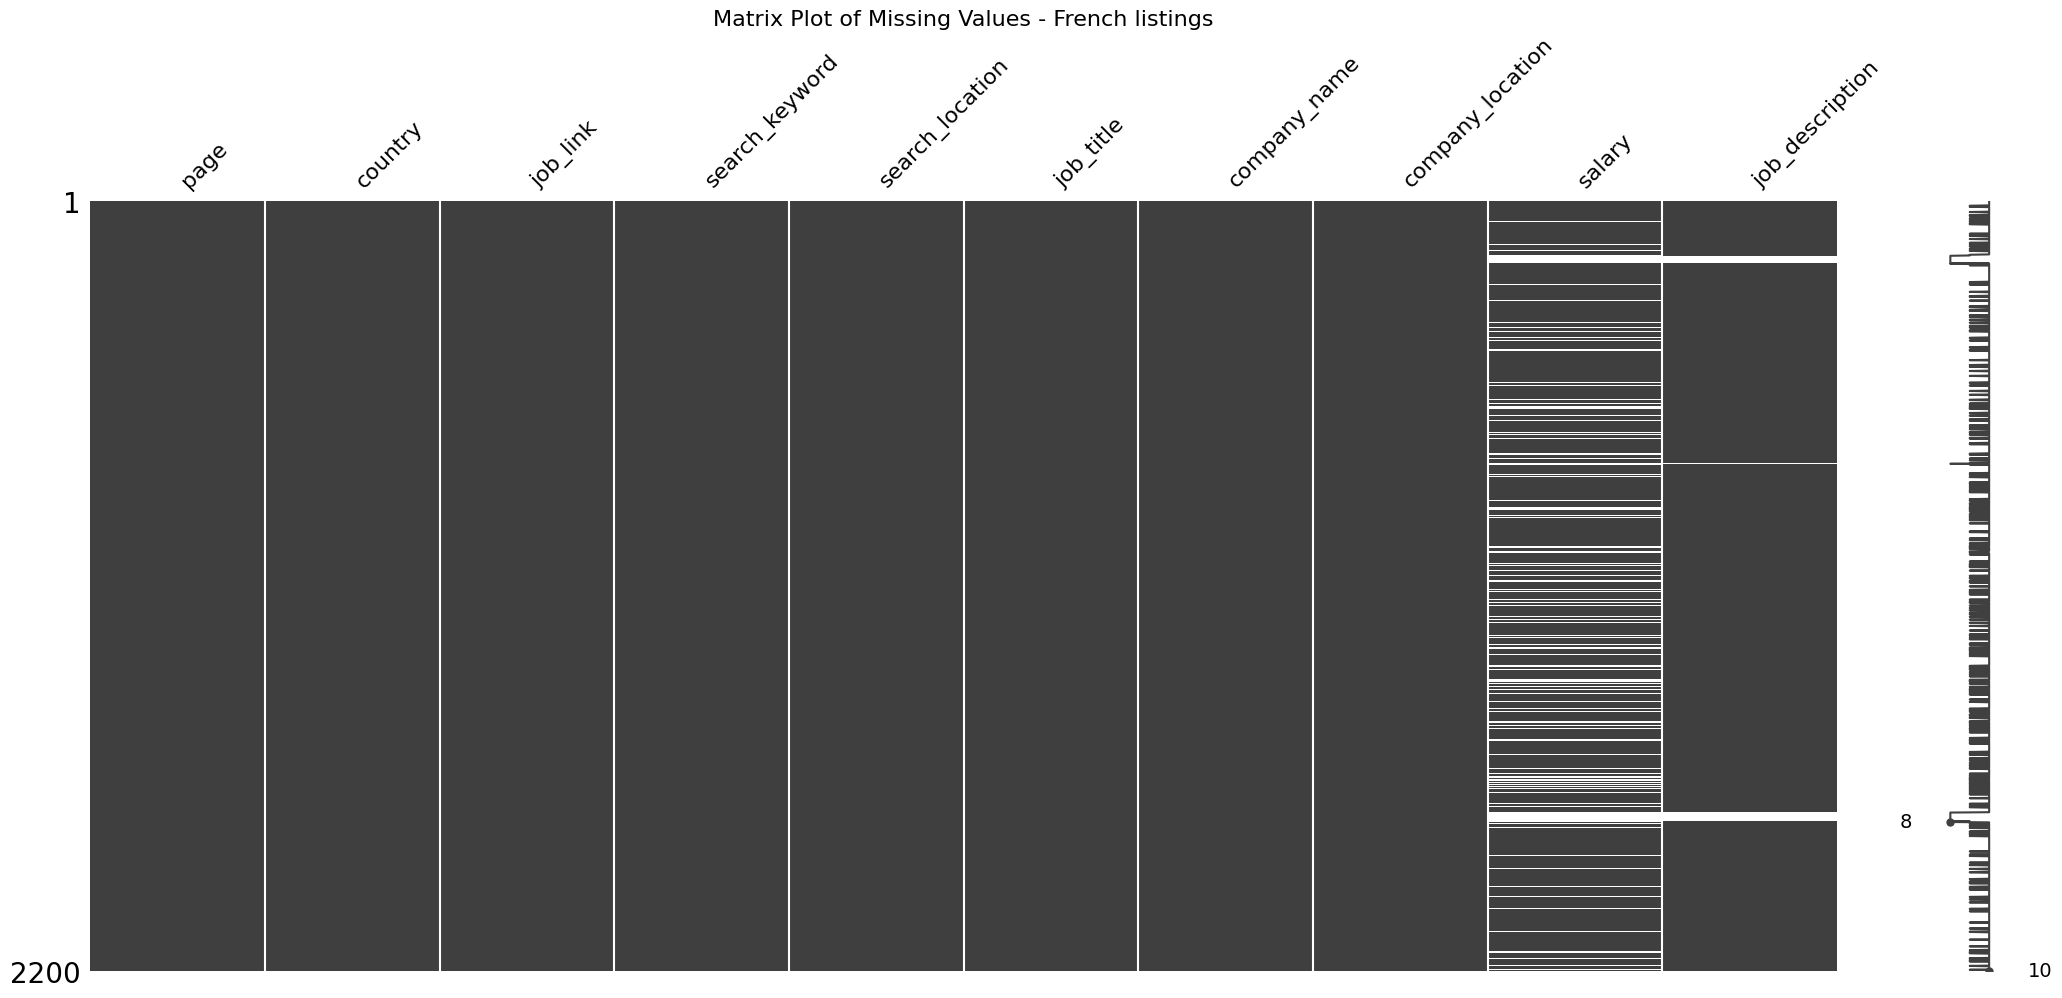

In [15]:
# Visualize missing data patterns 
msno.matrix(dfs['France']) #.sample(250)
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16) 
plt.show()

In [16]:
# Look into the missing descriptions for French job listings (scraper requests seems to have been blocked here?)
print(dfs['France'].isnull().sum())
#dfs['France'][dfs['France']['job_description'].isnull()].head()

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64


In [17]:
# Manual import of missing job description data retrieved directly from URLs 
df_FRA_missing = pd.read_csv(MISSING)
df_FRA_missing.head(3)

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description_new
0,11,France,https://www.indeed.fr/rc/clk?jk=cce878d76d9b30...,Data+Analyst,Paris (75),Business Analyst Customer Data 360 H/F,AIR FRANCE KLM,Roissy-en-France (95),CDI,Air France KLM recrute :\n\nVous rejoignez l'é...
1,11,France,https://www.indeed.fr/rc/clk?jk=56a9127952012f...,Data+Analyst,Paris (75),Senior Data Analyst - Paris,Aircall,Paris (75),NaN,Paris\nG&A – 13008 - Data /\nFull Time /\nHybr...
2,11,France,https://www.indeed.fr/rc/clk?jk=f43bcf87ea7bcd...,Data+Analyst,Paris (75),Marketing Business Analyst - (CDD 6 mois),Deliveroo,Paris (75),NaN,Why Deliveroo\n\nOur mission is to transform t...


In [18]:
# Merge French data frames based on the 'job_link' column (serves as unique identifier)
merged_df = pd.merge(dfs['France'], df_FRA_missing[['job_link', 'job_description_new']], on='job_link', how='left')
merged_df['job_description'] = merged_df['job_description'].fillna(merged_df['job_description_new'])
merged_df.drop(columns='job_description_new', inplace=True)
dfs['France'] = merged_df
# Verify that there are no missing values in 'job_description'
print(dfs['France'].isnull().sum())

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description       0
dtype: int64


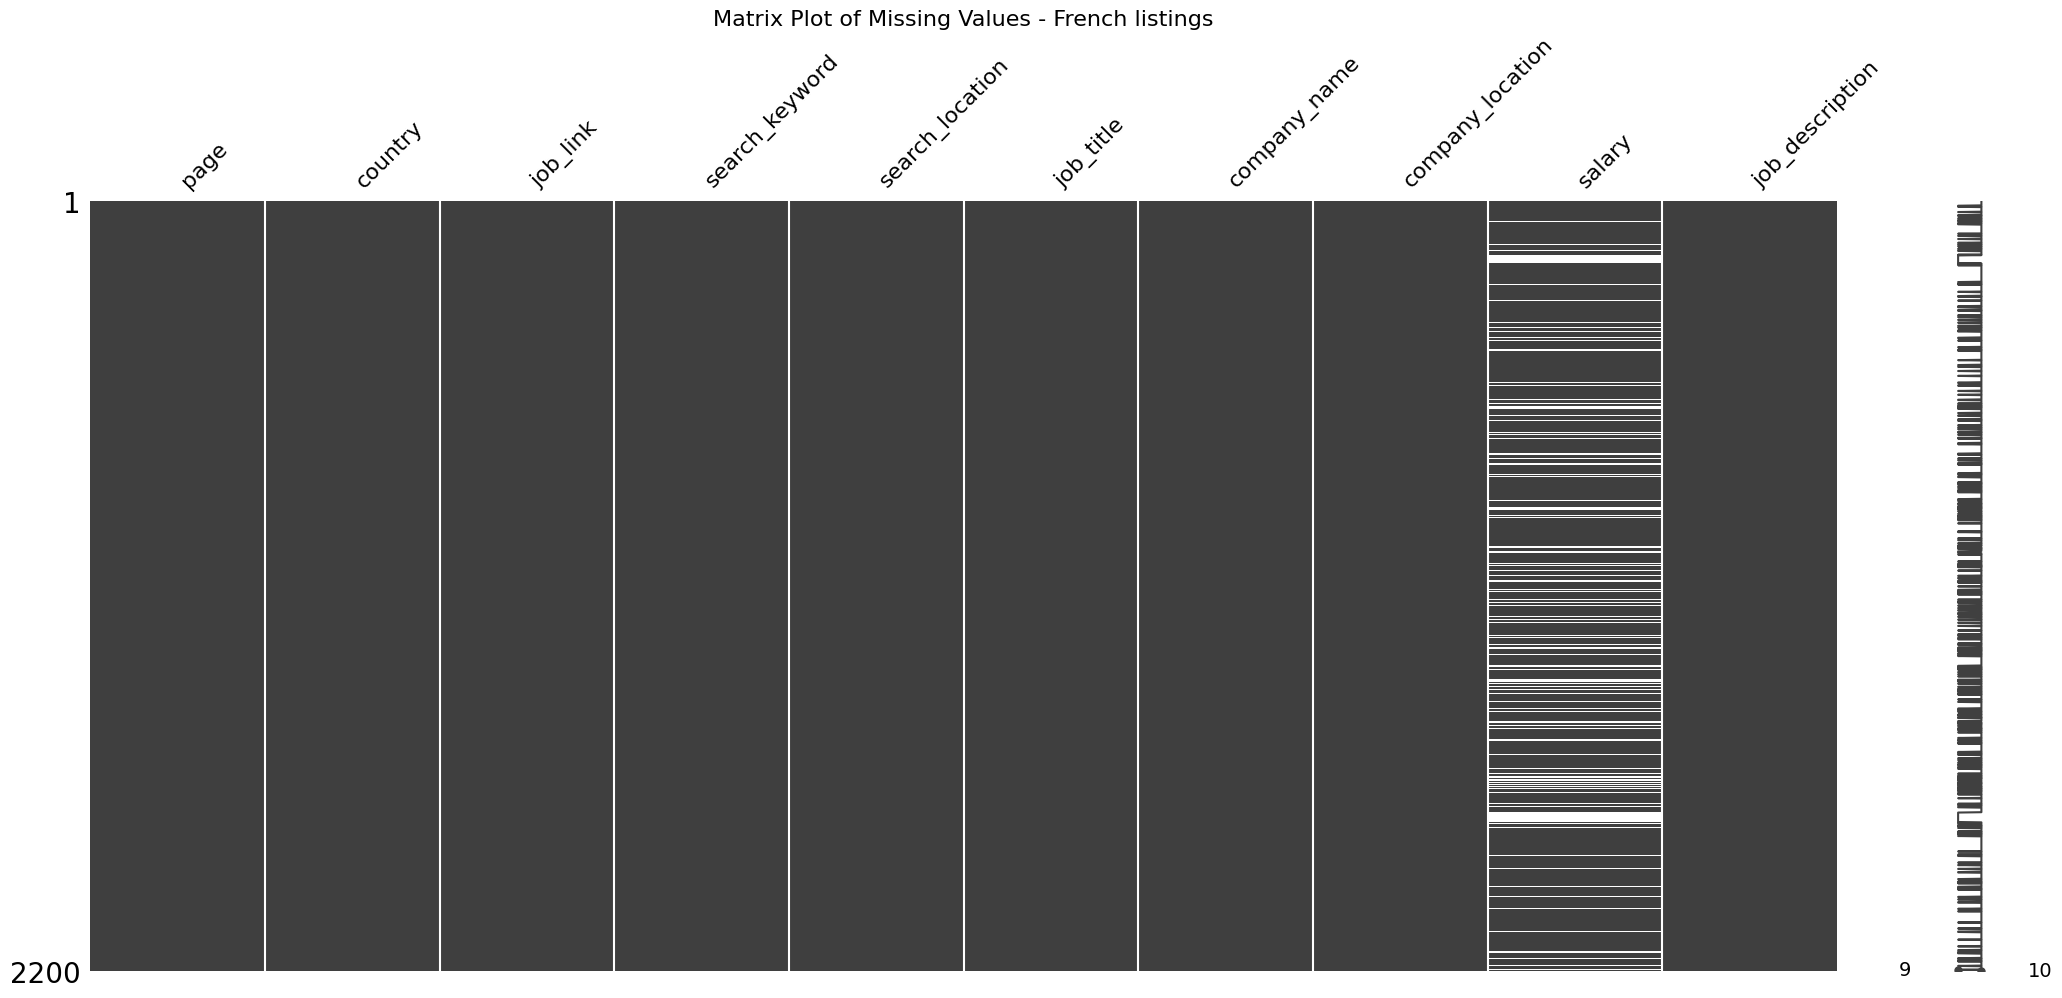

In [19]:
# Now the job_description should not have missing values anymore
msno.matrix(dfs['France'])
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16)  
plt.show()

In [20]:
# Verify consistent data types after the newly added info in job_description column
dfs['France'] = dfs['France'].astype(dicts.dtype_dict)
dfs['France'].dtypes

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object

### Check for duplicates

In [21]:
{mf.check_duplicates(df) for _, df in dfs.items()}

DataFrame with 320 rows has 0 duplicates.
DataFrame with 2200 rows has 0 duplicates.
DataFrame with 769 rows has 0 duplicates.
DataFrame with 1317 rows has 0 duplicates.


{None}

No rows are completely identical, but there are numerous examples of completely identical job descriptions. These are likely _reposts_ (the same job appearing multiple times, just with different unique links). We will remove these entries if the job descriptions are the (+ identical locations and company name), but first we have to normalize the job description (see below). 

### Clean columns

In [22]:
# Clean search_keyword and search_location columns: replace '+' with ' ' 
dfs = {country: df.assign(
   search_keyword=pd.Categorical(df['search_keyword'].astype(str).str.replace('+', ' ')),
   search_location=pd.Categorical(df['search_location'].astype(str).str.replace('+', ' '))
) for country, df in dfs.items()}
# Verify that it worked 
dfs['Sweden'].head(3)

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description
0,1,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data Analyst,Stockholm,Data Analyst (Data Visualization),Swedium Global Services,Distansjobb in Stockholm,NaN,Data Analyst (Data Visualization) Swedium ...
1,1,Sweden,https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...,Data Analyst,Stockholm,Data Analyst,Deploja AB,169 73 Solna,NaN,Role: Website Performance: Web analyst foc...
2,1,Sweden,https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...,Data Analyst,Stockholm,Data Analyst,Cubane Solutions AB,Stockholm,Heltid,Responsibilities Website Performance: Web...


In [23]:
# Clean job_title column 
dfs = {country: df.assign(
   job_title=df['job_title'].str.lower().pipe(
       lambda x: x.str.replace(r'\(?(h/f|f/h)\)?', '', regex=True).str.strip() 
       if country == 'France' else x
   )
) for country, df in dfs.items()}

In [24]:
# Merge all dfs in the dictionary into a single df
df_combined = pd.concat(dfs.values(), ignore_index=True)
df_combined.reset_index(drop=True, inplace=True)
# Add dates when data was scraped 
df_combined['date'] = np.where(df_combined['country'].isin(['Sweden', 'USA']), pd.to_datetime('2024-09-19'), pd.to_datetime('2024-09-20'))
df_combined.head()

,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description,date
0,1,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data Analyst,Stockholm,data analyst (data visualization),Swedium Global Services,Distansjobb in Stockholm,NaN,Data Analyst (Data Visualization) Swedium ...,2024-09-19
1,1,Sweden,https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...,Data Analyst,Stockholm,data analyst,Deploja AB,169 73 Solna,NaN,Role: Website Performance: Web analyst foc...,2024-09-19
2,1,Sweden,https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...,Data Analyst,Stockholm,data analyst,Cubane Solutions AB,Stockholm,Heltid,Responsibilities Website Performance: Web...,2024-09-19
3,1,Sweden,https://se.indeed.com/rc/clk?jk=265b21402a8391...,Data Analyst,Stockholm,data analyst,Sobi,Stockholm,Heltid,Company Description Statistics show that wo...,2024-09-19
4,1,Sweden,https://se.indeed.com/rc/clk?jk=65bfa8c313624f...,Data Analyst,Stockholm,"juniora analysts till operations, engineering,...",Deloitte,113 57 Stockholm,Heltid,Företagsbeskrivning Deloitte är en glob...,2024-09-19


In [25]:
# Language identification for job descriptions (can take a little while)
df_combined['language'] = df_combined['job_description'].map(tf.detect_language)

In [26]:
# Assign job_id to each row, instead of using URLs as unique identifiers
df_combined.insert(0, 'job_id', range(1, len(df_combined) + 1))
df_combined.head(3)

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description,date,language
0,1,1,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data Analyst,Stockholm,data analyst (data visualization),Swedium Global Services,Distansjobb in Stockholm,NaN,Data Analyst (Data Visualization) Swedium ...,2024-09-19,en
1,2,1,Sweden,https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...,Data Analyst,Stockholm,data analyst,Deploja AB,169 73 Solna,NaN,Role: Website Performance: Web analyst foc...,2024-09-19,en
2,3,1,Sweden,https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...,Data Analyst,Stockholm,data analyst,Cubane Solutions AB,Stockholm,Heltid,Responsibilities Website Performance: Web...,2024-09-19,en


In [27]:
# Normalize text data in job_description
normalized_descriptions = df_combined.groupby('language')[['job_description']].apply(tf.normalize_group)
normalized_descriptions = normalized_descriptions.reset_index()
df_combined = df_combined.reset_index(drop=True)
df_combined = pd.merge(df_combined, normalized_descriptions[['language', 'job_description', 'job_description_norm']], on=['language', 'job_description'], how='left')

Normalizing text for language group: en
Normalizing text for language group: fr
Normalizing text for language group: it
Normalizing text for language group: sv


In [28]:
df_combined.head()

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description,date,language,job_description_norm
0,1,1,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data Analyst,Stockholm,data analyst (data visualization),Swedium Global Services,Distansjobb in Stockholm,NaN,Data Analyst (Data Visualization) Swedium ...,2024-09-19,en,data analyst data visualization swedium global...
1,1,1,Sweden,https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...,Data Analyst,Stockholm,data analyst (data visualization),Swedium Global Services,Distansjobb in Stockholm,NaN,Data Analyst (Data Visualization) Swedium ...,2024-09-19,en,data analyst data visualization swedium global...
2,2,1,Sweden,https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...,Data Analyst,Stockholm,data analyst,Deploja AB,169 73 Solna,NaN,Role: Website Performance: Web analyst foc...,2024-09-19,en,role website performance web analyst focus spe...
3,2,1,Sweden,https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...,Data Analyst,Stockholm,data analyst,Deploja AB,169 73 Solna,NaN,Role: Website Performance: Web analyst foc...,2024-09-19,en,role website performance web analyst focus spe...
4,3,1,Sweden,https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...,Data Analyst,Stockholm,data analyst,Cubane Solutions AB,Stockholm,Heltid,Responsibilities Website Performance: Web...,2024-09-19,en,responsibility website performance web analyst...


In [29]:
df_combined[['job_description', 'job_description_norm']].head()

,job_description,job_description_norm
0,Data Analyst (Data Visualization) Swedium ...,data analyst data visualization swedium global...
1,Data Analyst (Data Visualization) Swedium ...,data analyst data visualization swedium global...
2,Role: Website Performance: Web analyst foc...,role website performance web analyst focus spe...
3,Role: Website Performance: Web analyst foc...,role website performance web analyst focus spe...
4,Responsibilities Website Performance: Web...,responsibility website performance web analyst...


In [30]:
# Now remove duplicates based on normalized job description. 
# Identify rows with same job description, company, and location (or unique url) and keep only the latest job listing
df_combined = mf.remove_duplicates_jobdesc(df_combined)

Initial rows: 10092
Rows after removing exact duplicates: 3029
Final rows: 3029
Total duplicates removed: 7063
--------------------------------------------------


In [31]:
# Map language codes to full language names 
df_combined['language'] = df_combined['language'].map(dicts.language_map)

In [32]:
# Verify data types for new columns (compare to dicts.dtype_dict)
df_combined.dtypes

job_id                           int64
page                             int64
country                 string[python]
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                        object
job_description_norm            object
dtype: object

In [33]:
df_combined = df_combined.astype({
    'job_id': 'int64',
    'language': 'category',
    'job_description_norm': 'string'
})
df_combined.dtypes

job_id                           int64
page                             int64
country                 string[python]
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
dtype: object

In [34]:
df_combined.head(3)

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,job_description,date,language,job_description_norm
6,4,1,Sweden,https://se.indeed.com/rc/clk?jk=265b21402a8391...,Data Analyst,Stockholm,data analyst,Sobi,Stockholm,Heltid,Company Description Statistics show that wo...,2024-09-19,english,company description statistic show woman under...
13,8,1,Sweden,https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data Analyst,Stockholm,fraud & data analyst to the fraud strategy & a...,Entercard Group AB,111 39 Stockholm,NaN,About Entercard Entercard is one of Scandin...,2024-09-19,english,entercard entercard one scandinavia’s leading ...
20,12,1,Sweden,https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...,Data Analyst,Stockholm,data analyst,Star Stable Entertainment,Distansjobb in 118 27 Stockholm,NaN,About Star Stable Entertainment Once upon a ...,2024-09-19,english,star stable entertainment upon time 2011 found...


## Descriptive statistics

In [84]:
# Describe (numerical) columns  
mask = df_combined['country'] == 'Sweden'
df_combined[mask].describe(include='all').head()

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
count,263.000000,263.000000,263,263,263,263,263,263,263,113,...,263,263,2.0,2.0,2,2,2.0,2.0,2.0,2.0
unique,NaN,NaN,1,263,4,3,194,198,88,10,...,2,263,<NA>,<NA>,1,1,<NA>,<NA>,<NA>,<NA>
top,NaN,NaN,Sweden,https://se.indeed.com/rc/clk?jk=132e951bba6ac1...,Data Scientist,Stockholm,systemutvecklare,Cubane Solutions AB,Stockholm,Heltid,...,english,hiring gi analyst nordregio expanding gi team ...,<NA>,<NA>,sek,month,<NA>,<NA>,<NA>,<NA>
freq,NaN,NaN,263,1,131,186,19,7,69,58,...,133,1,<NA>,<NA>,2,2,<NA>,<NA>,<NA>,<NA>
mean,169.490494,2.593156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27500.0,50000.0,NaN,NaN,27500.0,50000.0,2386.45,4339.0


In [85]:
# Describe categorical columns  
af.desc_categorical(df_combined[mask])

Value counts for column: country
country
Sweden    263
Name: count, dtype: Int64

Value counts for column: job_title
job_title
systemutvecklare                                 19
data analyst                                     13
data scientist                                   13
business analyst                                  8
senior data scientist                             5
                                                 ..
pricing coordinator                               1
senior business intelligence analyst              1
senior logistics analyst                          1
powerbi utvecklare                                1
production analytics lead [game intelligence]     1
Name: count, Length: 194, dtype: Int64

Value counts for column: company_name
company_name
Cubane Solutions AB      7
Deploja AB               6
JobBusters AB            4
Volvo Group              4
TEN10 AB                 4
                        ..
Techster Solutions       1
JAS Worldwide        

### Preliminary observations, Swedish job listings:
- __Most frequent job titles__: Systemutvecklare, Data Analyst, Data Scientist.
- __Most frequent company__: Cubane Solutions AB. 
- __Company location__: Stockholm primarily. 
- __Salary ranges__: Few numerical values are provided.

In [86]:
mask = df_combined['country'] == 'France'
df_combined[mask].describe(include='all').head(4)

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
count,1365.0,1365.0,1365,1365,1365,1365,1365,1365,1365,1108,...,1365,1365,155.0,155.0,155,155,155.0,155.0,155.0,155.0
unique,NaN,NaN,1,1365,4,3,1151,718,256,164,...,2,1343,<NA>,<NA>,1,4,<NA>,<NA>,<NA>,<NA>
top,NaN,NaN,France,https://www.indeed.fr/rc/clk?jk=87348216f5b0a7...,Product Analyst,Paris (75),data analyst,AXA,Paris (75),Temps plein,...,french,entité lagardère travel retail duty free globa...,<NA>,<NA>,euro,year,<NA>,<NA>,<NA>,<NA>
freq,NaN,NaN,1365,1,502,1200,39,38,380,299,...,983,2,<NA>,<NA>,155,109,<NA>,<NA>,<NA>,<NA>


In [87]:
af.desc_categorical(df_combined[mask]) 

Value counts for column: country
country
France    1365
Name: count, dtype: Int64

Value counts for column: job_title
job_title
data analyst                                                                                            39
data scientist                                                                                          32
business analyst                                                                                        13
data analyst intern                                                                                      8
business analyst data                                                                                    7
                                                                                                        ..
apprenticeship - business data analyst - september 2024 - (m/f)                                          1
alternance - assistant data analyst                                                                      1
business analyst

### Preliminary observations, French job listings:
- Many listings compared to Sweden. 
- __Most frequent job titles__: Data Analyst (sometimes with suffix H/F and/or Intern). 
- __Most frequently mentioned company__: AXA, PwC, Capgemini.
- __Company location__: Most in Paris. 
- __Salary ranges__: Need to split column to be able to draw any conclusions.

In [88]:
mask = df_combined['country'] == 'Italy'
df_combined[mask].describe(include='all').head(4)

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
count,566.0,566.0,566,566,566,566,566,566,566,17,...,566,566,17.0,17.0,17,17,17.0,17.0,17.0,17.0
unique,NaN,NaN,1,566,4,3,451,309,96,14,...,3,552,<NA>,<NA>,1,3,<NA>,<NA>,<NA>,<NA>
top,NaN,NaN,Italy,https://it.indeed.com/rc/clk?jk=46de7544ab716b...,Data Analyst,"Milano, Lombardia",data scientist,BIP - Business Integration Partners,"Milano, Lombardia",1.000 € al mese,...,italian,ntt data trusted global innovator è tra princi...,<NA>,<NA>,euro,month,<NA>,<NA>,<NA>,<NA>
freq,NaN,NaN,566,1,259,387,33,30,148,3,...,314,3,<NA>,<NA>,17,8,<NA>,<NA>,<NA>,<NA>


In [89]:
af.desc_categorical(df_combined[mask])

Value counts for column: country
country
Italy    566
Name: count, dtype: Int64

Value counts for column: job_title
job_title
data scientist                                         33
data analyst                                           16
business analyst                                       11
senior data analyst                                     6
cyber security analyst                                  4
                                                       ..
senior business analyst                                 1
data scientist middle                                   1
bi engineer                                             1
junior business analyst autohero                        1
kpmg open platform | risk - security senior analyst     1
Name: count, Length: 451, dtype: Int64

Value counts for column: company_name
company_name
BIP - Business Integration Partners    30
NTT Data                               16
KPMG                                   14
DXC Technology     

### Preliminary observations, Italian job listings:
- Many listings compared to Sweden, but less than France.
- __Most frequent job titles__: Data Scientist.
- __Most frequently mentioned company__: BIP - Business Integration Partners. 
- __Company location__: Milano. 
- __Salary ranges__: Few numerical entries provided. 

In [90]:
mask = df_combined['country']=='USA'
df_combined[mask].describe(include='all').head(4)

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
count,835.0,835.0,835,835,835,835,835,835,835,789,...,835,835,625.0,625.0,625,625,625.0,625.0,625.0,625.0
unique,NaN,NaN,1,835,4,3,737,470,185,524,...,1,823,<NA>,<NA>,1,4,<NA>,<NA>,<NA>,<NA>
top,NaN,NaN,USA,https://www.indeed.com/rc/clk?jk=274ddb9b95715...,Data Scientist,"New York, NY",data analyst,Citi,"New York, NY",Full-time,...,english,wavemaker positively provokes growth client re...,<NA>,<NA>,dollar,year,<NA>,<NA>,<NA>,<NA>
freq,NaN,NaN,835,1,264,487,12,27,179,149,...,835,2,<NA>,<NA>,625,595,<NA>,<NA>,<NA>,<NA>


In [91]:
af.desc_categorical(df_combined[mask])

Value counts for column: country
country
USA    835
Name: count, dtype: Int64

Value counts for column: job_title
job_title
data analyst                                                   12
business analyst                                               11
senior machine learning engineer                                9
senior data scientist                                           8
senior business analyst                                         5
                                                               ..
sales analyst                                                   1
healthcare claims api/edi business analyst (local) (hybrid)     1
ecommerce analyst                                               1
senior financial analyst, north america commercial finance      1
business analyst, performance internal controls                 1
Name: count, Length: 737, dtype: Int64

Value counts for column: company_name
company_name
Citi                        27
JPMorganChase               

### Preliminary observations, American job listings:
- Number of listings are less than for France. 
- __Most frequent job titles__: Data Analyst, Business analyst. But titles need to be sorted to get the full picture since there are additions such as 'senior'. Interesting that Machine Learning Engineer shows up. 
- __Most frequently mentioned company__: Citi. 
- __Company location__: New York.  
- __Salary ranges__: Need to look into the numerical entries only, to be continued. 

## Feature engineering 

### Retrieve numeric values for salary

In [92]:
df_combined.head()

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
6,4,1,Sweden,https://se.indeed.com/rc/clk?jk=265b21402a8391...,Data Analyst,Stockholm,data analyst,Sobi,Stockholm,Heltid,...,english,company description statistic show woman under...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
13,8,1,Sweden,https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data Analyst,Stockholm,fraud & data analyst to the fraud strategy & a...,Entercard Group AB,111 39 Stockholm,NaN,...,english,entercard entercard one scandinavia’s leading ...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
20,12,1,Sweden,https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...,Data Analyst,Stockholm,data analyst,Star Stable Entertainment,Distansjobb in 118 27 Stockholm,NaN,...,english,star stable entertainment upon time 2011 found...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
23,14,1,Sweden,https://se.indeed.com/rc/clk?jk=7fa39868401ee6...,Data Analyst,Stockholm,data analyst,Baby Journey AB,114 51 Stockholm,NaN,...,swedish,baby journey lanserades hösten 2020 app riktar...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
26,16,2,Sweden,https://se.indeed.com/rc/clk?jk=e8928767cb355b...,Data Analyst,Stockholm,oit-237 data classification and labeling analyst,WSP Sverige,111 20 Stockholm,NaN,...,english,wsp global consulting firm assisting public pr...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [93]:
for country in df_combined['country'].unique():
    mask = df_combined['country'] == country
    unique_langs = df_combined[mask]['language'].unique().tolist()
    print('*' * 30, f'Retrieving salaries for {country}:', f'Languages: {unique_langs}', sep='\n')
    result = sf.parse_salary_column(df_combined[mask], languages=unique_langs, country=country, time_keyword_dict=dicts.time_keywords)
    print(f'Rows changed for {country}: {result.shape[0]}. Original rows retrieved: {df_combined[mask].shape[0]}')
    assert result.shape[0]==df_combined[mask].shape[0]
    if result.shape[0] != df_combined[mask].shape[0]:
        print(f"Warning: Size mismatch for {country}. Expected {df_combined[mask].size}, got {result.size}")
        break 
    columns_to_update = ['min_salary', 'max_salary', 'currency', 'time_unit']
    df_combined.loc[mask, columns_to_update] = result[columns_to_update]
    print('*' * 30 + '\n')

******************************
Retrieving salaries for Sweden:
Languages: ['english', 'swedish']
     min_salary  max_salary currency
195     40000.0     80000.0      sek
389     15000.0     20000.0      sek
Rows changed for Sweden: 263. Original rows retrieved: 263
******************************

******************************
Retrieving salaries for France:
Languages: ['french', 'english']
      min_salary  max_salary currency
533        721.0      1747.0     euro
779     38452.41     50000.0     euro
806        800.0      1500.0     euro
846      45000.0     55000.0     euro
870      33000.0     33000.0     euro
...          ...         ...      ...
5725     35000.0     35000.0     euro
5728     35000.0     45000.0     euro
5757     42000.0     48000.0     euro
5759     45000.0     55000.0     euro
5760     40000.0     55000.0     euro

[155 rows x 3 columns]
Rows changed for France: 1365. Original rows retrieved: 1365
******************************

******************************
R

In [94]:
df_combined.head()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 6 to 10091
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   job_id                3029 non-null   int64         
 1   page                  3029 non-null   int64         
 2   country               3029 non-null   string        
 3   job_link              3029 non-null   object        
 4   search_keyword        3029 non-null   category      
 5   search_location       3029 non-null   object        
 6   job_title             3029 non-null   string        
 7   company_name          3029 non-null   string        
 8   company_location      3029 non-null   object        
 9   salary                2027 non-null   object        
 10  job_description       3029 non-null   string        
 11  date                  3029 non-null   datetime64[ns]
 12  language              3029 non-null   category      
 13  job_description_norm  

In [95]:
print('Sample of updated data:')
print(df_combined[df_combined['salary'].notna()][['country', 'salary', 'min_salary', 'max_salary', 'currency', 'time_unit']].sample(5))

Sample of updated data:
     country                                    salary  min_salary  \
4940  France                                     Stage        <NA>   
7219     USA  $95,000 - $125,000 a year  -   Full-time     95000.0   
5783  France                                       CDI        <NA>   
7373     USA                  $90 a day  -   Freelance        90.0   
4544  France                               Temps plein        <NA>   

      max_salary currency time_unit  
4940        <NA>     <NA>      <NA>  
7219    125000.0   dollar      year  
5783        <NA>     <NA>      <NA>  
7373        90.0   dollar       day  
4544        <NA>     <NA>      <NA>  


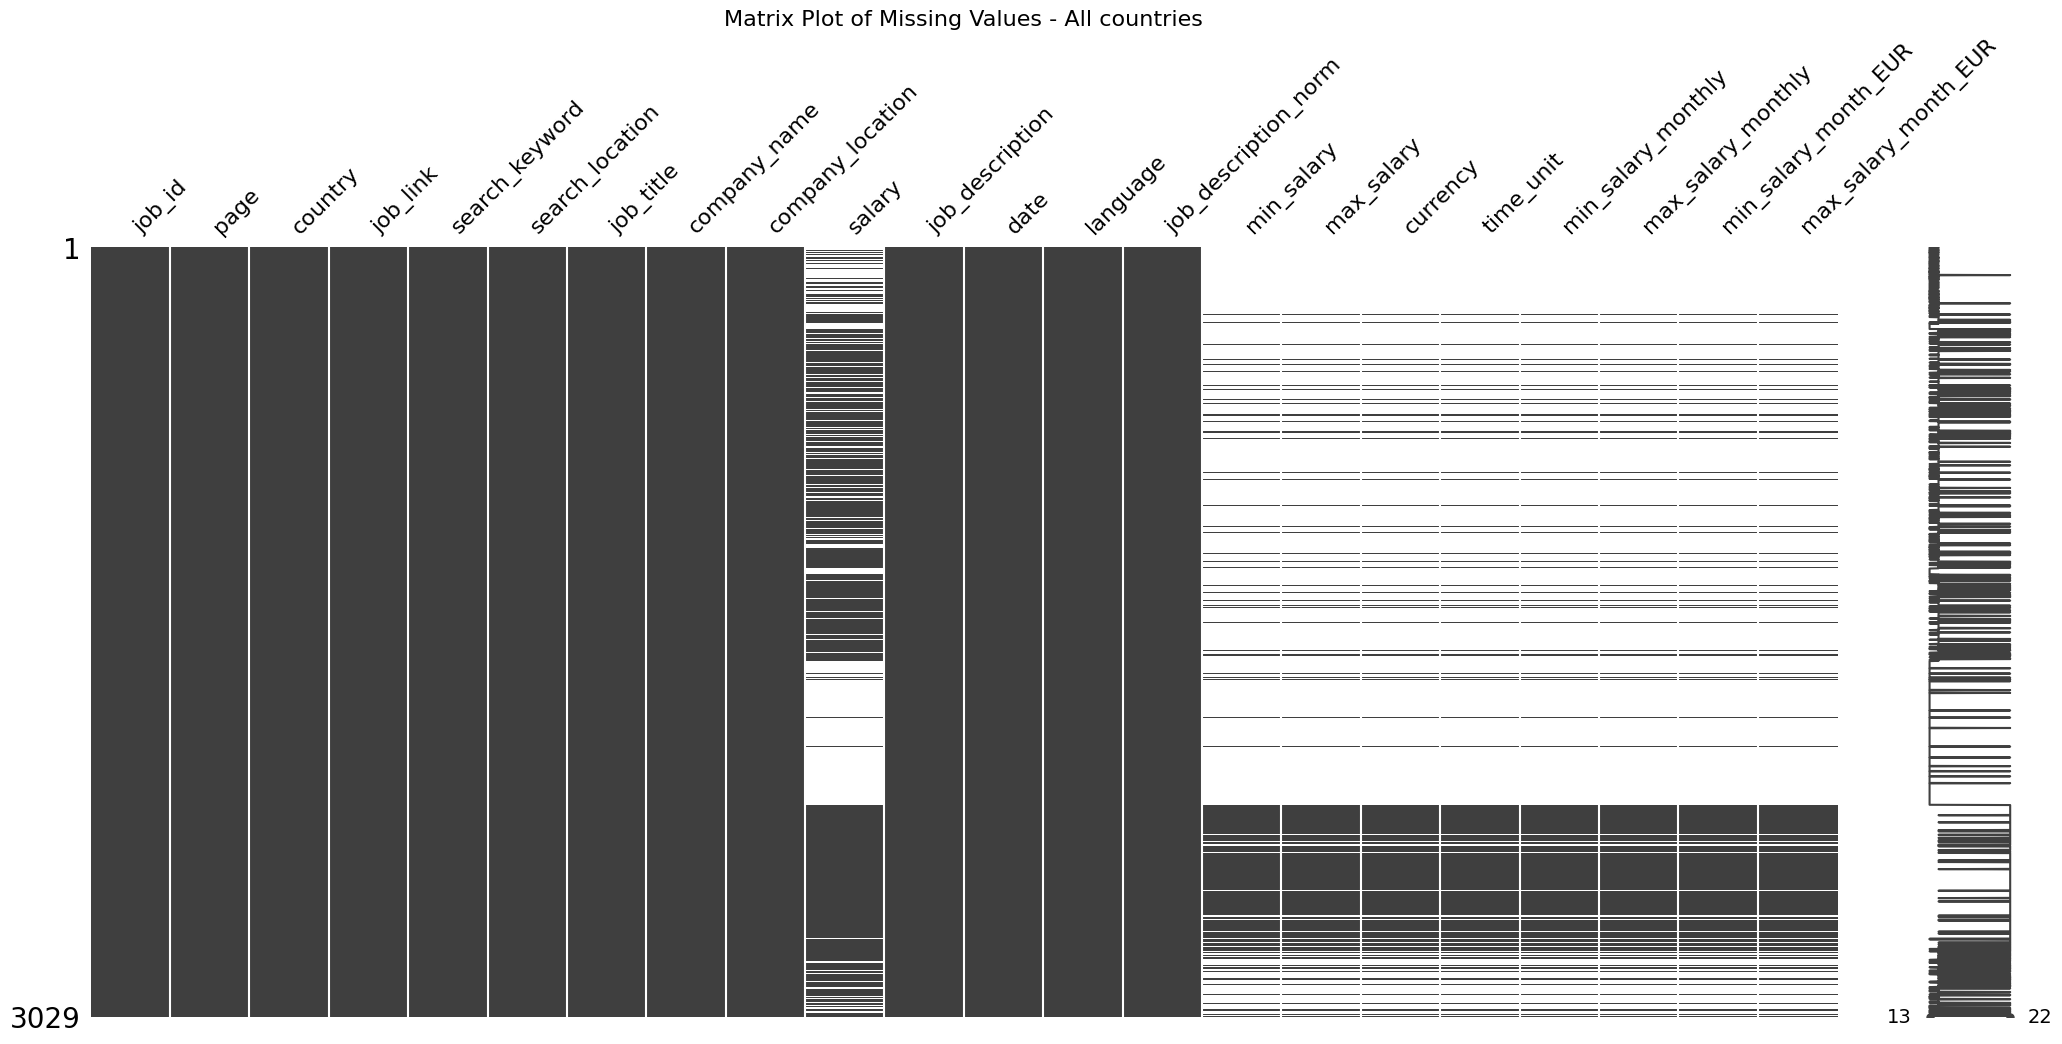

In [96]:
# Check missing values now 
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values - All countries', fontsize=16)  
plt.show()

In [97]:
# Make sure data types are correct again
df_combined.dtypes

job_id                           int64
page                             int64
country                 string[python]
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
min_salary                     Float64
max_salary                     Float64
currency                      category
time_unit                     category
min_salary_monthly             Float64
max_salary_monthly             Float64
min_salary_month_EUR           Float64
max_salary_month_EUR           Float64
dtype: object

In [98]:
# Get monthly salary for all rows 
df_combined['min_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'min_salary', 'time_unit')
df_combined['max_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'max_salary', 'time_unit')
df_combined[df_combined['min_salary_monthly'].notna()].head(3)

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
195,145,1,Sweden,https://se.indeed.com/rc/clk?jk=044708271c5bec...,Data Scientist,Göteborg,senior data scientist som vill skapa framtida ...,Artificial Collective,413 27 Göteborg,40 000SEK - 80 000SEK per månad,...,swedish,hej redo göra verklig skillnad ai artificial c...,40000.0,80000.0,sek,month,40000.0,80000.0,3471.2,6942.4
389,279,1,Sweden,https://se.indeed.com/rc/clk?jk=3daeeaf597909e...,Product Analyst,Malmö,swedish customer support analyst - bulgaria ba...,TELUS International Europe,Lund,15 000SEK - 20 000SEK per månad - Tillsvida...,...,english,please note position based sofia bulgaria help...,15000.0,20000.0,sek,month,15000.0,20000.0,1301.7,1735.6
533,351,3,France,https://www.indeed.fr/rc/clk?jk=8a827ea3e37c59...,Data Analyst,Paris (75),alternance - assistant data analyst,CMI France,Télétravail partiel à 92300 Levallois-Perret,De 721 € à 1 747 € par mois - Alternance,...,french,cmi medium régie publicitaire groupe cmi franc...,721.0,1747.0,euro,month,721.0,1747.0,721.0,1747.0


In [99]:
# Convert salary to same currency using exchange rate
df_combined = sf.process_salaries(df_combined)

Exchange rates: {'SEK': 0.08678, 'USD': 0.95039, 'EUR': 1}

Debug Information:
Currency mapping: {'dollar': 0.95039, 'euro': 1, 'sek': 0.08678}

Currency value counts: currency
<NA>      2230
dollar     625
euro       172
sek          2
Name: count, dtype: int64


TypeError: Object with dtype category cannot perform the numpy op multiply

In [ ]:
# Verify correct data types 
# Convert currency, time_unit into categorical 
df_combined[['currency', 'time_unit']] = df_combined[['currency', 'time_unit']].astype('category')
df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']] = df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']].astype('Float64')
df_combined.dtypes

### Detect keywords : overall

In [ ]:
# Extract keywords for countries
common_keywords = pd.Series(dicts.countries_languages).apply(
    lambda x: tf.extract_keywords(df_combined, x[0], x[1]))

# Access keywords for specific country
common_keywords['SWE'][0]

### Detect keywords : technical skills

In [ ]:
# Create keyword counts for different countries 
technical_skills = pd.concat([
    af.count_keywords(df_combined, country_name, dicts.software_keywords, 'job_description_norm')
    for _, (country_name, _) in dicts.countries_languages.items()
], ignore_index=True).sort_values('Count', ascending=False)
technical_skills.head()

In [100]:
# Relative frequency of keyword for resp. country and search keyword
skills_country = af.calculate_country_frequencies(technical_skills, df_combined)

# View top skills for each country
top_skills_by_country = skills_country.sort_values(['Country', 'Frequency'], ascending=[True, False]).groupby('Country').head(10)
top_skills_by_country

,Country,Category,Keyword,Count,Total_jobs,Frequency
70,France,Programming Languages/Software,excel,715,1365,52.38
55,France,Development Tools,git,575,1365,42.12
83,France,Programming Languages/Software,sql,478,1365,35.02
78,France,Programming Languages/Software,python,393,1365,28.79
46,France,Data Vis and BI Tools,power bi,319,1365,23.37
51,France,Data Vis and BI Tools,tableau,307,1365,22.49
71,France,Programming Languages/Software,go,120,1365,8.79
80,France,Programming Languages/Software,rust,113,1365,8.28
67,France,Programming Languages/Software,r,112,1365,8.21
13,France,Cloud Computing,azure,110,1365,8.06


In [101]:
# Top 10 keywords overall
global_skills = af.calculate_global_frequencies(technical_skills, df_combined)
global_skills.head(10)

,Category,Keyword,Count,Frequency,Total_jobs
84,Programming Languages/Software,excel,1596,52.69,3029
62,Development Tools,git,1183,39.06,3029
97,Programming Languages/Software,sql,1122,37.04,3029
92,Programming Languages/Software,python,983,32.45,3029
57,Data Vis and BI Tools,tableau,575,18.98,3029
52,Data Vis and BI Tools,power bi,538,17.76,3029
85,Programming Languages/Software,go,453,14.96,3029
96,Programming Languages/Software,scala,396,13.07,3029
94,Programming Languages/Software,rust,389,12.84,3029
80,Programming Languages/Software,r,351,11.59,3029


In [102]:
skills_by_role = af.calculate_frequencies_by_search_keyword(technical_skills, df_combined)

# Get top 10 skills for each search keyword
top_skills_by_role = skills_by_role.groupby('Search Keyword', observed=True).head(10)
top_skills_by_role

,Search Keyword,Category,Keyword,Count,Total_jobs,Frequency
58,BI Analyst,Programming Languages/Software,excel,461,762,60.50
38,BI Analyst,Data Vis and BI Tools,power bi,409,762,53.67
69,BI Analyst,Programming Languages/Software,sql,377,762,49.48
42,BI Analyst,Data Vis and BI Tools,tableau,270,762,35.43
45,BI Analyst,Development Tools,git,248,762,32.55
65,BI Analyst,Programming Languages/Software,python,243,762,31.89
59,BI Analyst,Programming Languages/Software,go,134,762,17.59
56,BI Analyst,Programming Languages/Software,r,94,762,12.34
10,BI Analyst,Cloud Computing,azure,90,762,11.81
66,BI Analyst,Programming Languages/Software,rust,87,762,11.42


### Detect keywords : interview process

In [103]:
dicts.context_patterns

{'english': 'recruitment process|interview process',
 'french': "processus de recrutement|processus d\\'entretien",
 'italian': 'processo di reclutamento|processo di colloquio',
 'swedish': 'rekryteringsprocess|intervjuprocess'}

In [104]:
# Extract interview information
interview_info_df, interview_flags_df = tf.extract_interview_details(df_combined, 
                                                                  dicts.interview_stages, 
                                                                  dicts.context_patterns, 
                                                                  'job_description_norm', 
                                                                  'language')

# Sum Boolean columns in interview_flags_df to count occurrences of each interview stage
stage_counts = interview_flags_df.select_dtypes(include='bool').sum()
stage_counts

phone_screening         49
technical_screening      8
case_study              16
coding_assessment        6
behavioral_interview     4
on_site_interview        3
presentation             0
dtype: int64

In [105]:
# Example: run this to retrieve text about technical interviews
#interview_info_df[interview_info_df['technical_screening_text'].notna()]

Information about the interview process seems to mostly be missing/left out from the job listnings. However, the most common category appears to be phone/video call screenings, followed by case studies. 

## Analysis 


### Categorical features

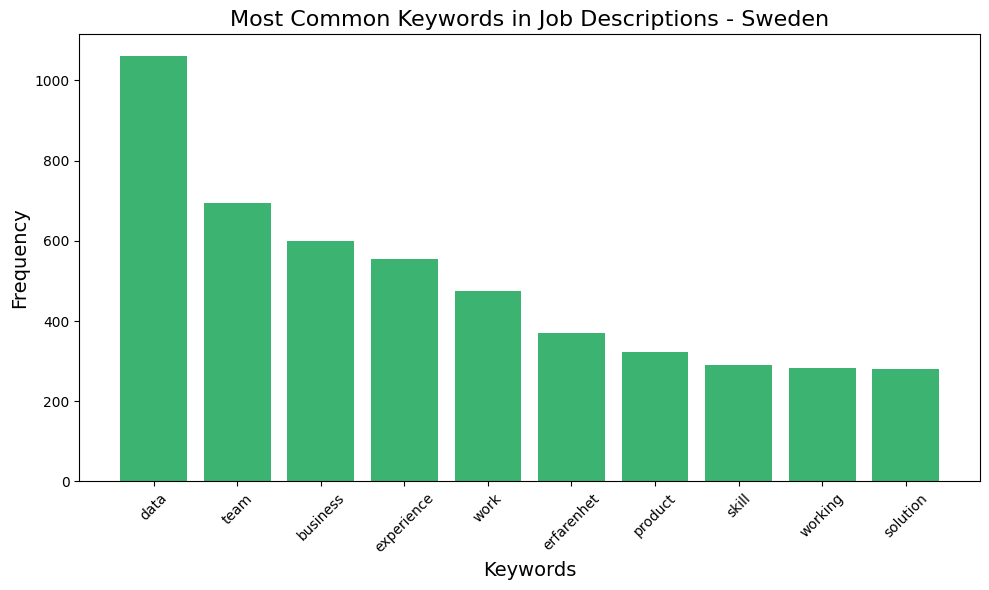

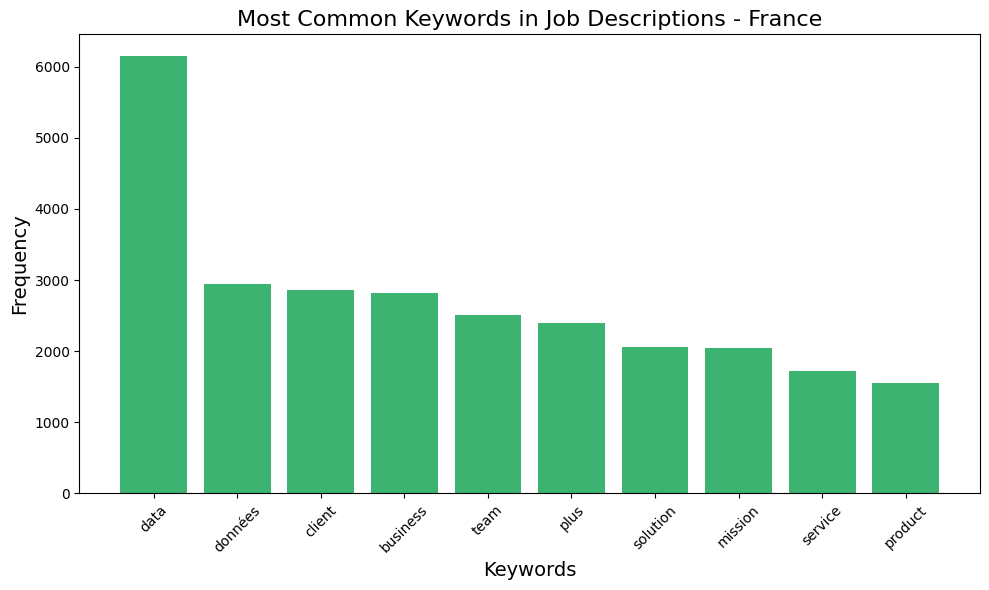

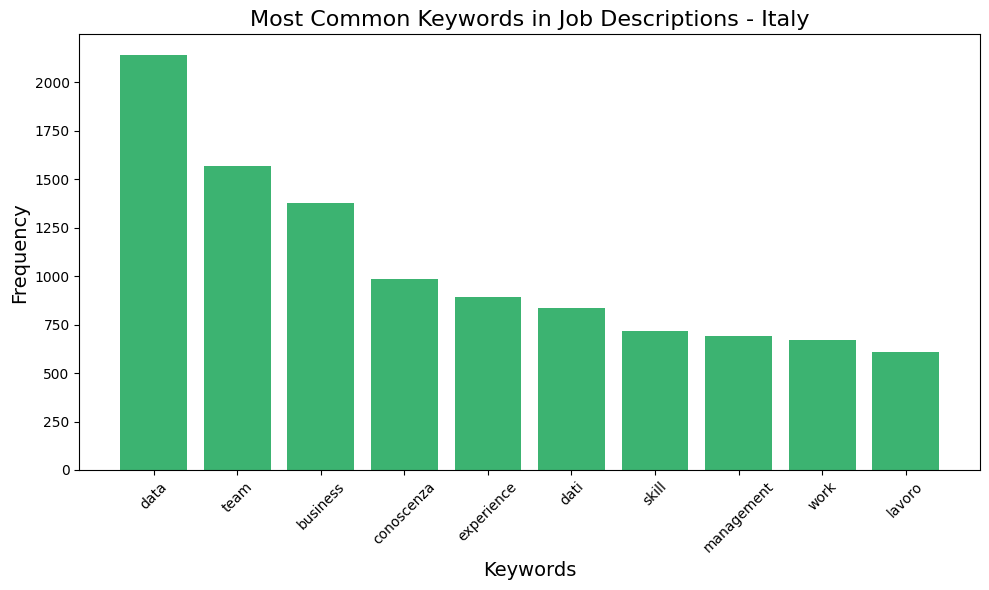

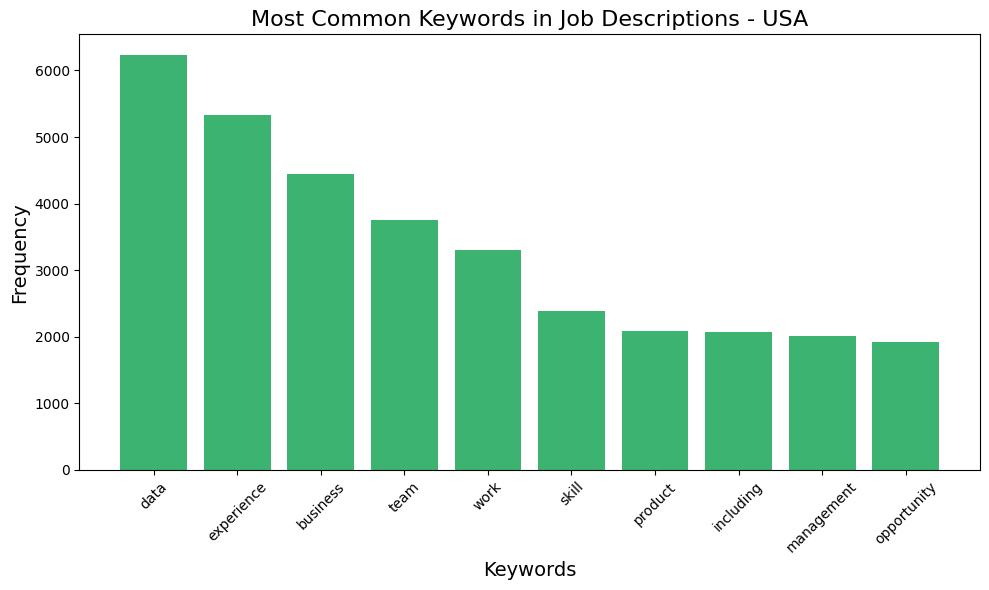

In [106]:
# Plot common keywords 
categorical_plots = {
    country_name: pf.plot_common_keywords(common_keywords[code][0], country_name)
    for code, (country_name, *_) in dicts.countries_languages.items()
}

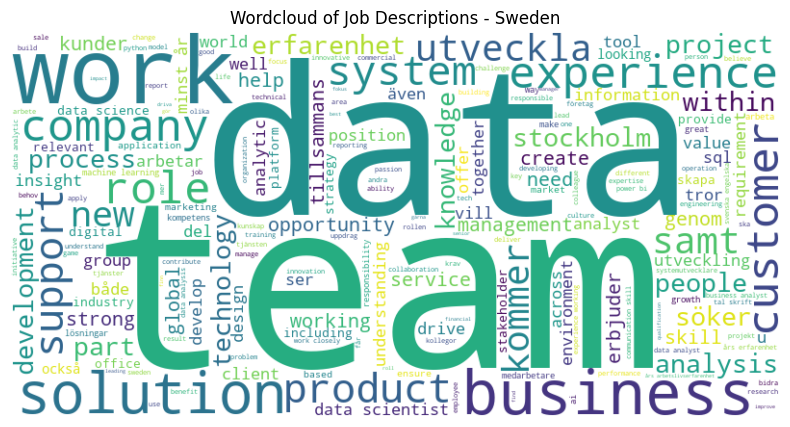

In [ ]:
# Word cloud visualizations per country
for code, (name, _) in dicts.countries_languages.items():
    pf.plot_wordtree(common_keywords[code][1], name)

In [ ]:
technical_skills.head()

In [ ]:
pf.plot_stacked_bar_chart(technical_skills)

In [ ]:
# Skills for different roles 
pf.plot_top_keyword_heatmap(technical_skills)

In [ ]:
pf.plot_keywords_per_category_subplots(df=technical_skills, n_top=5, figsize=(16, 12))

In [ ]:
top_skills_by_role.head()

In [ ]:
top_skills_by_country.head()

In [ ]:
#skills_country

#global_skills

In [ ]:
non_numeric_columns = df_combined.select_dtypes(exclude=['int64', 'float64', 'Float64', 'Int64']).columns.tolist()
non_numeric_columns

In [ ]:
# Categorical variables
categorical_cols = ['search_keyword', 'country', 'job_title', 'company_name', 'company_location']
# Things to fix for all job_title entries: to lower, remove (H/F) and (F/H) and H/F and F/H 

In [ ]:
# Example usage
pf.plot_categorical(df_combined, ['job_title', 'company_name', 'company_location'], top_n=25, horizontal=True)
# Need to also group titles that are basically the same, e.g. strip (F/H) and (H/F) from french jobs 

In [72]:
# It would be cool to recode these into for example postal codes, so that we later can see them on a map in Tableau

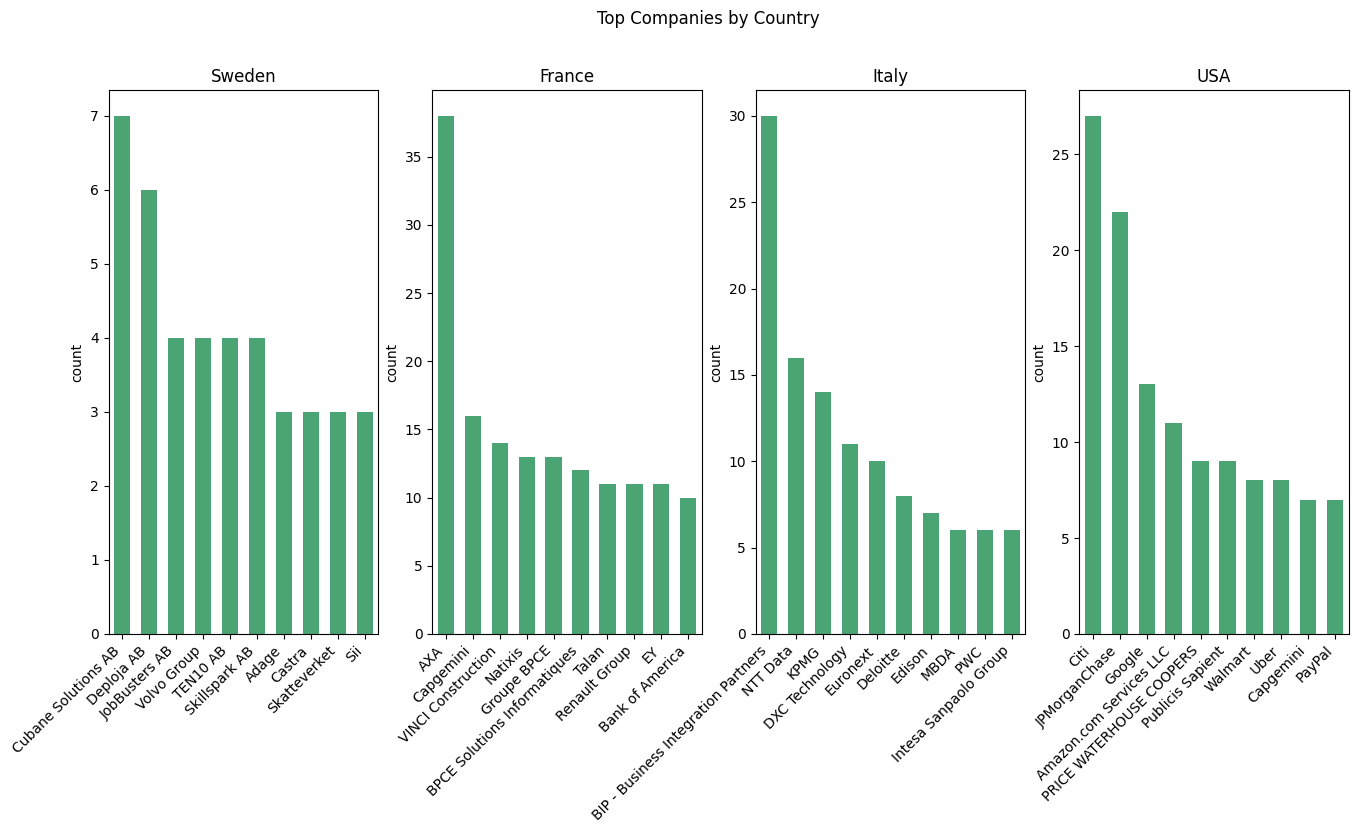

In [73]:
# Plot top company names per country
pf.plot_grouped_barplots(
    df_combined,
    group_col='country',
    value_col='company_name',
    title='Top Companies by Country'
)

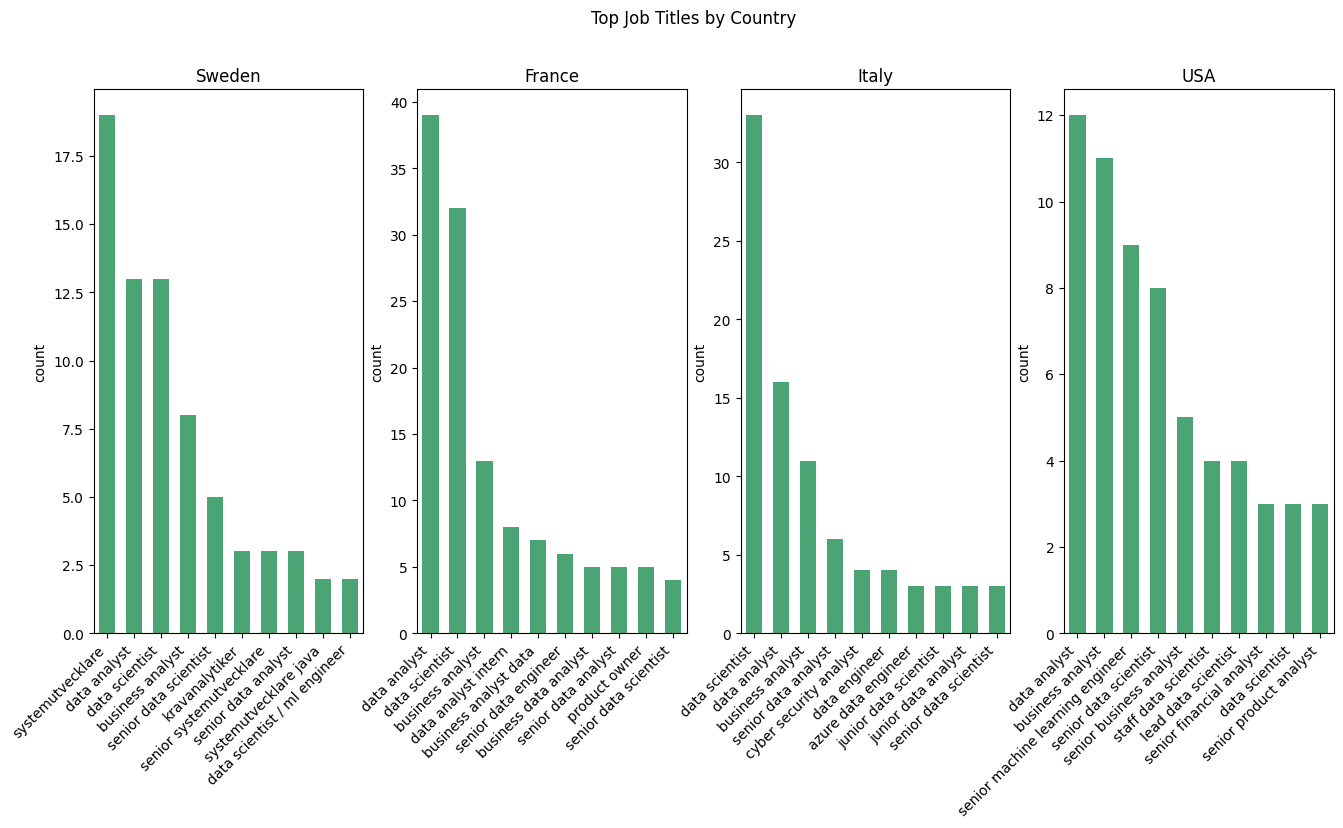

In [74]:
# For job titles by country
pf.plot_grouped_barplots(
    df_combined,
    group_col='country',
    value_col='job_title',
    title='Top Job Titles by Country'
)

### Numerical features


Outliers for min_salary_month_EUR:
Number of outliers: 8
Outlier values:
€18,952.36
€19,578.03
€19,799.79
€19,799.79
€20,045.31
€20,045.31
€20,235.39
€20,591.78
Lower bound: €0.00
Upper bound: €18,611.80

Outliers for max_salary_month_EUR:
Number of outliers: 3
Outlier values:
€29,327.45
€31,592.55
€31,679.67
Lower bound: €0.00
Upper bound: €28,926.85


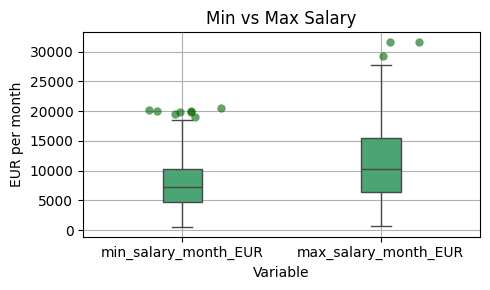

Summary statistics for salary columns:
       min_salary_month_EUR  max_salary_month_EUR
count                 799.0                 799.0
mean                 7781.6              11152.41
std                 3903.36               5989.18
min                   500.0                 800.0
25%                 4751.95               6455.17
50%                 7295.35              10303.81
75%                10295.89              15443.84
max                20591.78              31679.67


In [75]:
# Summary statistics and boxplots for salary (outliers with jitter to more easily see them)
salary_cols = ['min_salary_month_EUR', 'max_salary_month_EUR']
outliers_df, outlier_rows = pf.plot_boxplot(df_combined, salary_cols)

print('Summary statistics for salary columns:')
print(df_combined[salary_cols].describe().round(2)) 

In [76]:
outlier_rows[['search_keyword', 'country', 'company_location', 'job_title', 'job_description_norm', 'min_salary_month_EUR', 'max_salary_month_EUR', 'outlier_source']]

,search_keyword,country,company_location,job_title,job_description_norm,min_salary_month_EUR,max_salary_month_EUR,outlier_source
7938,Data Scientist,USA,"New York, NY","grp dir, data sci/adv alt -svp",basic information location ny ny 100 w 33rd po...,20591.783333,22967.758333,min salary
7970,Data Scientist,USA,"Hybrid work in New York, NY",founding ml researcher,garden garden gardenintel.com accelerates glob...,19799.791667,31679.666667,"min salary,max salary"
7972,Data Scientist,USA,"Hybrid work in New York, NY 10011","director, data science",role peloton seeking experienced leader field ...,19578.034,25454.612167,min salary
8721,BI Analyst,USA,"New York, NY",executive director – data & analytics operatio...,reporting svp cross medium measurement advanc...,20045.309083,26880.197167,min salary
8728,BI Analyst,USA,"New York, NY",executive director – data & analytics operatio...,executive director – data analytics operation...,20045.309083,26880.197167,min salary
8775,BI Analyst,USA,"New York, NY","vice president, pgs ai data analytics leader",pfizer’s purpose breakthrough change patients’...,18952.360583,31592.547583,"min salary,max salary"
8852,BI Analyst,USA,"New York, NY","vp, operational excellence & business analytics",bizops sourcing strategy group heart transfor...,20235.387083,26016.92625,min salary
9708,Data Scientist,USA,"Chicago, IL",senior/lead c++ engineer - market data,ctc cutting-edge proprietary trading firm long...,19799.791667,20591.783333,min salary
7791,Data Scientist,USA,"New York, NY 10001",ai strategy & design - healthcare sector - sen...,ey you’ll chance build career unique are globa...,11293.801167,29327.451417,max salary


What are these outliers representing and where are they coming from? 
- All from USA (mostly NY). 
- Founder, director, vice president, VP, and other senior roles. 

Lets also look at the smallest salaries and where they come from. 

In [77]:
# Get min salaries and see if there is a pattern
min_salaries = (df_combined
                  .dropna(subset=['min_salary_month_EUR'])  # Remove rows with NA salaries
                  .nsmallest(10, 'min_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'country', 'company_location', 'min_salary_month_EUR', 'salary']])

min_salaries

,search_keyword,job_title,company_name,country,company_location,min_salary_month_EUR,salary
5984,Data Analyst,junior analyst,Wayshi srl,Italy,20122 Milano,500.0,500 € - 1.300 € al mese
533,Data Analyst,alternance - assistant data analyst,CMI France,France,Télétravail partiel à 92300 Levallois-Perret,721.0,De 721 € à 1 747 € par mois - Alternance
4770,BI Analyst,alternant(e) data analyst connaissance client,IMX FRANCE,France,Télétravail partiel à 93500 Pantin,759.78,"De 759,78 € à 1 766,92 € par mois - Alternance"
806,Data Analyst,alternant data analyst en business intelligence,HEC Paris,France,78350 Jouy-en-Josas,800.0,De 800 € à 1 500 € par mois - Alternance
6351,Data Analyst,cloud/data engineer,Quick Algorithm Analytics,Italy,"Remoto in Milano, Lombardia",800.0,800 € al mese
2883,Data Scientist,stage - data analyst junior,AXA,France,Suresnes (92),832.0,De 832 € à 1 868 € par mois - Temps partiel...
5964,Data Analyst,logistics analyst - internship,Samsung,Italy,"Milano, Lombardia",900.0,900 € al mese
3234,Data Scientist,alternance data analyst,The Nuum Factory,France,69009 Lyon 9e,926.0,À partir de 926 € par mois - Alternance
1987,Data Analyst,transversal business analyst - stage - paris (...,papernest,France,Télétravail partiel à 75019 Paris,1000.0,De 1 000 € à 1 300 € par mois - Stage
5158,BI Analyst,data analyst - stage,SAS Terroirs d'Avenir,France,Télétravail partiel à 94400 Vitry-sur-Seine,1000.0,De 1 000 € à 1 400 € par mois - Temps plein


The lowest salaries are from France and Italy, for internships, 'alternance', and junior roles. 

In [78]:
# Get top salaries in France and see if there is a pattern
top_fr_salaries = (df_combined[df_combined['country'] == 'France']
                  .dropna(subset=['max_salary_month_EUR'])  # Remove rows with NA salaries
                  .nlargest(10, 'max_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'company_location', 'max_salary_month_EUR', 'salary']])

top_fr_salaries

,search_keyword,job_title,company_name,company_location,max_salary_month_EUR,salary
5641,BI Analyst,cloud analyste informatique - azure aws finops...,PROPULSE IT,Télétravail à Paris (75),18000.0,"De 450 € à 900 € par jour - Statut cadre, I..."
4174,Product Analyst,data gouvernance (it) / freelance,PARTENOR,Paris (75),15200.0,De 520 € à 760 € par jour - Indépendant / f...
5323,BI Analyst,data analyste informatique expert sas (it) / f...,Cogniwave dynamics,Paris (75),14000.0,De 600 € à 700 € par jour - Indépendant / f...
1887,Data Analyst,senior data analyste informatique / data gouve...,LeHibou,Paris (75),13000.0,650 € par jour - Indépendant / freelance
1248,Data Analyst,géologiste - data analyste informatique - 270 ...,ISUPPLIER,Paris (75),12900.0,645 € par jour - Indépendant / freelance
1423,Data Analyst,business data analyste informatique - solvency...,NEXORIS,Paris (75),12000.0,De 550 € à 600 € par jour - Indépendant / f...
4815,BI Analyst,geodata scientist / analyste informatique (it)...,ODHCOM - FREELANCEREPUBLIK,Paris (75),12000.0,De 480 € à 600 € par jour - Indépendant / f...
5026,BI Analyst,data analyste informatique / développeur bi ta...,Bek Advisory,Paris (75),12000.0,600 € par jour - Indépendant / freelance
5391,BI Analyst,business analyste informatique - gm / emtn (it...,NEXORIS,Paris (75),12000.0,De 590 € à 600 € par jour - Indépendant / f...
3468,Product Analyst,business analyst si gestion des défauts...,1Dsolutions,Paris (75),11000.0,550 € par jour - Temps plein


Highest salaries in France are for indépendant / freelance jobs in Paris, paid by day rate. 

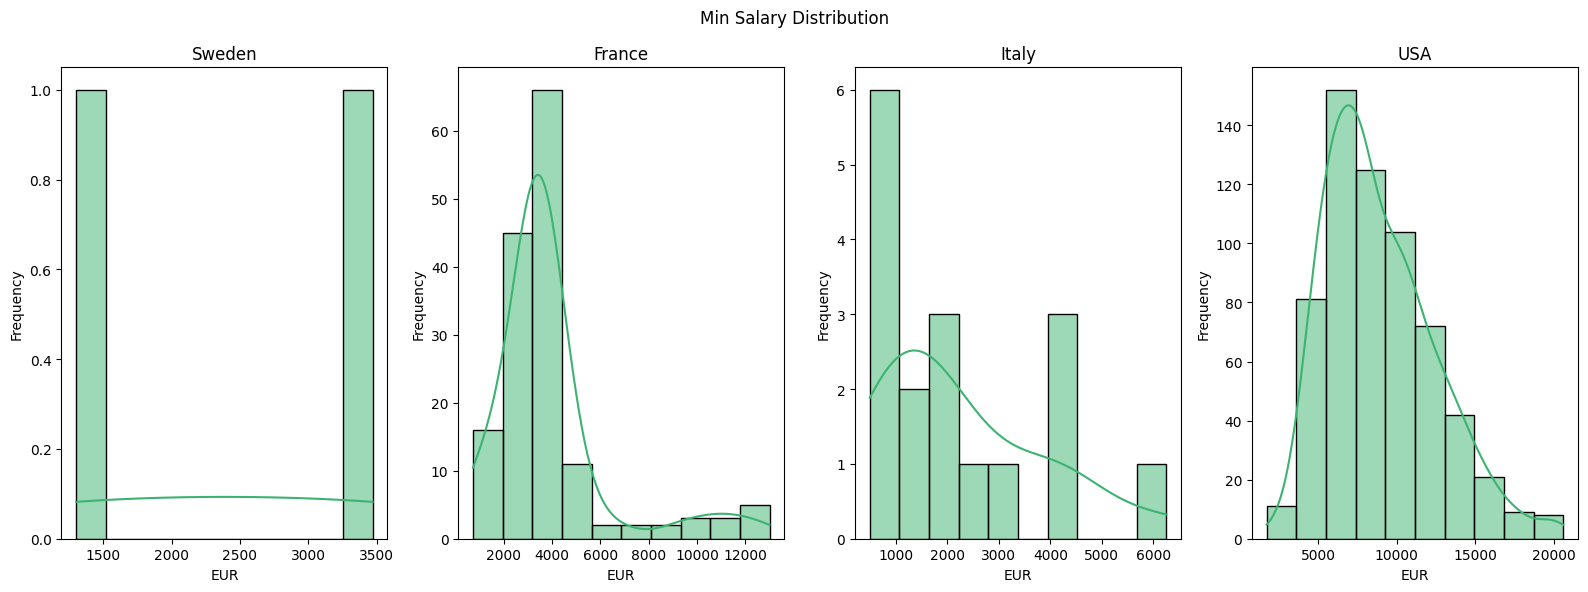

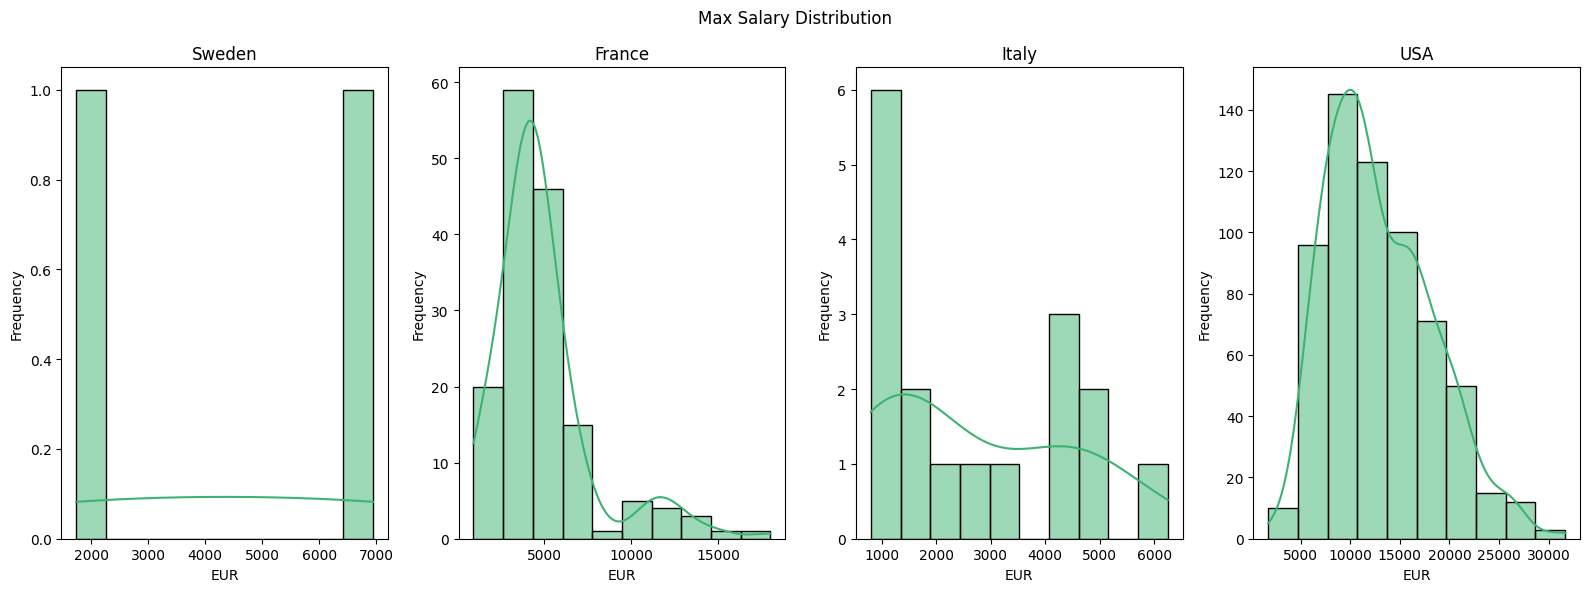

In [79]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[0], 
    bins = 10, 
    kde = True, 
    title = 'Min Salary Distribution'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[1], 
    bins = 10, 
    kde = True, 
    title = 'Max Salary Distribution'
)

In [80]:
salary_ranges = (
    df_combined
    .groupby('country')
    .agg({
        'min_salary_month_EUR': 'min',
        'max_salary_month_EUR': 'max'
    })
    .rename(columns={
        'min_salary_month_EUR': 'Lowest Monthly Salary (EUR)',
        'max_salary_month_EUR': 'Highest Monthly Salary (EUR)'
    })
)

salary_ranges

,Lowest Monthly Salary (EUR),Highest Monthly Salary (EUR)
country,,
France,721.0,18000.0
Italy,500.0,6250.0
Sweden,1301.7,6942.4
USA,1710.702,31679.666667


Lets look into the second peaks (e.g. max salary for France, with second peak after 10 000 EUR). 

In [81]:
# Filter by country 
filtered_df = df_combined[(df_combined['country'] == 'France') & 
                         (df_combined['min_salary_month_EUR'].notna())]

# Filter salary range 
filtered_df = filtered_df[(filtered_df['max_salary_month_EUR'] > 10000) & 
           (filtered_df['max_salary_month_EUR'] < 16000)]

filtered_df.head()

,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
1248,639,22,France,https://www.indeed.fr/rc/clk?jk=9bf7127dab79a5...,Data Analyst,Paris (75),géologiste - data analyste informatique - 270 ...,ISUPPLIER,Paris (75),645 € par jour - Indépendant / freelance,...,french,compétences géologie biostratigraphie sédim...,645.0,645.0,euro,day,12900.0,12900.0,12900.0,12900.0
1423,705,26,France,https://www.indeed.fr/rc/clk?jk=1576873c14d2f5...,Data Analyst,Paris (75),business data analyste informatique - solvency...,NEXORIS,Paris (75),De 550 € à 600 € par jour - Indépendant / f...,...,french,recherchons l'un partenaire business analyst ...,550.0,600.0,euro,day,11000.0,12000.0,11000.0,12000.0
1887,882,38,France,https://www.indeed.fr/rc/clk?jk=a18f4e1522a6bc...,Data Analyst,Paris (75),senior data analyste informatique / data gouve...,LeHibou,Paris (75),650 € par jour - Indépendant / freelance,...,french,analyse l?existant recommandations technique ...,650.0,650.0,euro,day,13000.0,13000.0,13000.0,13000.0
3468,1414,2,France,https://www.indeed.fr/rc/clk?jk=7743e6fa91e27d...,Product Analyst,Paris (75),business analyst si gestion des défauts...,1Dsolutions,Paris (75),550 € par jour - Temps plein,...,french,tjm 550€ paris collaborons partenaire actuelle...,550.0,550.0,euro,day,11000.0,11000.0,11000.0,11000.0
4160,1750,24,France,https://www.indeed.fr/rc/clk?jk=a7b21bcbaba540...,Product Analyst,Paris (75),data analyste informatiquee gcp / sql / big qu...,HIGHTEAM,Télétravail à Île-de-France,De 500 € à 550 € par jour - Indépendant / f...,...,french,offre solution data analyse collaboration dest...,500.0,550.0,euro,day,10000.0,11000.0,10000.0,11000.0


In [82]:
identical_cols = filtered_df.apply(lambda x: len(x.unique()) == 1)
print("Columns with identical values:", identical_cols[identical_cols].index.tolist())
print("\nThe identical values are:")

for col in identical_cols[identical_cols].index:
    print(f"{col}: {filtered_df[col].iloc[0]}")

filtered_df[filtered_df.apply(lambda x: len(x.unique()) == 1).index].head()

Columns with identical values: ['country', 'date', 'language', 'currency', 'time_unit']

The identical values are:
country: France
date: 2024-09-20 00:00:00
language: french
currency: euro
time_unit: day


,job_id,page,country,job_link,search_keyword,search_location,job_title,company_name,company_location,salary,...,language,job_description_norm,min_salary,max_salary,currency,time_unit,min_salary_monthly,max_salary_monthly,min_salary_month_EUR,max_salary_month_EUR
1248,639,22,France,https://www.indeed.fr/rc/clk?jk=9bf7127dab79a5...,Data Analyst,Paris (75),géologiste - data analyste informatique - 270 ...,ISUPPLIER,Paris (75),645 € par jour - Indépendant / freelance,...,french,compétences géologie biostratigraphie sédim...,645.0,645.0,euro,day,12900.0,12900.0,12900.0,12900.0
1423,705,26,France,https://www.indeed.fr/rc/clk?jk=1576873c14d2f5...,Data Analyst,Paris (75),business data analyste informatique - solvency...,NEXORIS,Paris (75),De 550 € à 600 € par jour - Indépendant / f...,...,french,recherchons l'un partenaire business analyst ...,550.0,600.0,euro,day,11000.0,12000.0,11000.0,12000.0
1887,882,38,France,https://www.indeed.fr/rc/clk?jk=a18f4e1522a6bc...,Data Analyst,Paris (75),senior data analyste informatique / data gouve...,LeHibou,Paris (75),650 € par jour - Indépendant / freelance,...,french,analyse l?existant recommandations technique ...,650.0,650.0,euro,day,13000.0,13000.0,13000.0,13000.0
3468,1414,2,France,https://www.indeed.fr/rc/clk?jk=7743e6fa91e27d...,Product Analyst,Paris (75),business analyst si gestion des défauts...,1Dsolutions,Paris (75),550 € par jour - Temps plein,...,french,tjm 550€ paris collaborons partenaire actuelle...,550.0,550.0,euro,day,11000.0,11000.0,11000.0,11000.0
4160,1750,24,France,https://www.indeed.fr/rc/clk?jk=a7b21bcbaba540...,Product Analyst,Paris (75),data analyste informatiquee gcp / sql / big qu...,HIGHTEAM,Télétravail à Île-de-France,De 500 € à 550 € par jour - Indépendant / f...,...,french,offre solution data analyse collaboration dest...,500.0,550.0,euro,day,10000.0,11000.0,10000.0,11000.0


Observations: 
- **Sweden**: Only has 2 data points. This was the smallest dataset but it also makes sense that there are few values isnce Swedish interview processes usually do not involve discussing salaries until the very end of the rounds. 
- **France**: It almost looks like there are two peaks. This is because we have several rows with high salaries for freelance work in Paris. 
- **Italy**: Also has a second peak for jobs in Milano. But this is also be since we have fewer data points. 
- **USA**: Significantly higher salaries overall, as to be expected. 

In [ ]:
def plot_box(df: pd.DataFrame, 
            y: str = 'max_salary_month_EUR',
            x: str = 'company_location',
            hue: str = 'job_title',
            figsize: tuple[int, int] = (10, 6)) -> None:
    """
    Create boxplot showing salary distribution by location and job title.
    """
    plt.figure(figsize=figsize)
    
    sns.boxplot(
        data=df,
        x=x,          # locations on x-axis
        y=y,          # salary on y-axis
        hue=hue,      # separate boxes by job title
        width=0.8
    )
    
    plt.xlabel('Company Location')
    plt.ylabel('Maximum Monthly Salary (EUR)')
    plt.title('Salary Distribution by Job Title and Location')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Get the 10 most common locations
common_locations = (df_combined
                   .query("country == 'France'")
                   ['company_location']
                   .value_counts()
                   .nlargest(10)
                   .index)

# Plot using filtered data
plot_box(
    df=df_combined.query("country == 'France' and company_location in @common_locations"),
    y='max_salary_month_EUR', 
    x='company_location', 
    hue='search_keyword',
    figsize=(12, 6)
)

In [ ]:
def plot_salary_by_keyword(df: pd.DataFrame, figsize: tuple[int, int] = (10, 6)) -> None:
    """Create boxplot of salaries by search keyword for France."""
    plt.figure(figsize=figsize)
    
    sns.boxplot(
        data=df.query("country == 'France'"),
        x='search_keyword',
        y='max_salary_month_EUR',
        color='mediumseagreen',
        width=0.5
    )
    
    plt.xlabel('Job Title')
    plt.ylabel('Maximum Monthly Salary (EUR)')
    plt.title('Salary Distribution by Job Title in France')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Use it like this:
plot_salary_by_keyword(df_combined)

In [ ]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='min_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Min Salary Distribution by Job Title'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='max_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Max Salary Distribution by Job Title'
)

## Bivariate analysis 

In [ ]:
## Bivariate and Multivariate Analysis
# - Pairwise correlations
# - Relationships between key variables
# Statistical tests to see if there are significant differences in salaries for these search terms 

In [ ]:
mean_salary = df_combined.groupby('search_keyword', observed=True)['min_salary_month_EUR'].mean().reset_index()
sns.barplot(data=mean_salary, x='search_keyword', y='min_salary_month_EUR')
plt.xticks(rotation=45)
plt.title('Average Salary by Job Title')
plt.show()

In [ ]:
# Disregarding the country in question, are data scientist salaries significantly higher?

In [ ]:
# Create salary bins
df_combined['salary_range'] = pd.qcut(
    df_combined['min_salary_month_EUR'], 
    q=4,  # Creates 4 equal-sized groups
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

# Create the plot with correct color syntax
sns.countplot(
    data=df_combined, 
    x='search_keyword', 
    hue='salary_range',
    palette='Greens'  # Using a green color palette
)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Job Titles by Salary Range')
plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(data=df_combined, x='search_keyword', hue='country')
plt.xticks(rotation=45)
plt.title('Count of Job Titles by Country')
plt.show()

Why are there tons of Product Analyst jobs in France? Also tons of BI Analyst jobs. 
    
There are a bunch of data analyst (also data scientist) jobs that are very well paid. Do they have anything in common? 

In [ ]:
import scipy.stats as stats
salary_ranges = pd.cut(df_combined['min_salary_month_EUR'], bins=[0, 20000, 40000, 60000, 80000, 100000], labels=['<20k', '20-40k', '40-60k', '60-80k', '80-100k'])
crosstab = pd.crosstab(df_combined['search_keyword'], salary_ranges)
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f'Chi-squared: {chi2}, p-value: {p}')

In [ ]:
# Create pivot table with NA handling
pivot_table = df_combined.pivot_table(
    values='max_salary_month_EUR', 
    index='country', 
    columns='search_keyword', 
    aggfunc='mean', 
    observed=True
)

# Convert NA values to numbers that seaborn can handle
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.heatmap(
    pivot_table, 
    annot=True,  # Show values
    cmap='YlGnBu',  # Color scheme
    fmt='.0f',  # Round to 0 decimal places
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title')
plt.tight_layout()
plt.show()

In [ ]:
# Create pivot table excluding USA and Sweden
pivot_table = (df_combined[~df_combined['country'].isin(['USA', 'Sweden'])]
               .pivot_table(
                   values='max_salary_month_EUR', 
                   index='country', 
                   columns='search_keyword', 
                   aggfunc='mean', 
                   observed=True
               ))

# Convert NA values to numbers
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table, 
    annot=True, 
    cmap='YlGnBu',
    fmt='.0f',
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title (France and Italy)')
plt.tight_layout()
plt.show()

## Conclusions 

### Categorical features: 
- Common keywords: 
- Technical skills required: 
- Interview process: 
- Locations: 
    
### Numerical features: 
- Salaries: 
- Salaries that stood out:
- Cominations that led to high salary: 
- Locations versus salaries: 

Salaries: 
- As expected, salaries are significantly higher in the US. For some reason, maximum salaries appear to be for Data Analyst jobs?
- If you want to be well paid in Europe, it seems like a good idea to become a Data Scientist in Sweden, or Product Analyst in France or Italy. There are tons of jobs that fell under the 'Product Analyst' title for France. Have to look into this. It would be worth looking into the job descriptions of these titles in France and Italy to understand this better. There are too few data points for Sweden. 

- Job titles appear to vary somewhat between countries (since top 3 ones were different for different countries). 
- Clean up job titles for different countries? The search algorithm actually is pretty bad? 


In [ ]:
# Save CSV files

# Need to retrieve location data for Tableau?  